In [28]:
# Importando bibliotecas e base de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

jogo = pd.read_csv("Projeto_SAS_Cartola_v3.csv", encoding='latin-1', sep=';')
# jogo

In [ ]:
# Coeficiente de Pearson
lista = []
for i in jogo:
    if jogo[i].dtypes != 'object':
        lista.append(i)

for i in lista:
    print(i)
    x = stats.pearsonr(jogo['time_resultado_anterior'], jogo[i])
    print(x)


In [ ]:
# Colunas do DataSet
jogo.info()

In [ ]:
# Analisando estrutura do DataSet
flamengo = jogo.loc[jogo['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
flamengo

In [ ]:
# Analisando linha com ID 363
flamengo.loc[363]
# flamengo.loc[274]

In [30]:
# Gerando dataSet de treino e retirando valores NaN
dataSetTreino = jogo
dataSetTreino = dataSetTreino[dataSetTreino['time_resultado_anterior'].notna()]
# dataSetTreino


In [31]:
# Analisando estrutura do DataSet de treino
flamengo = dataSetTreino.loc[dataSetTreino['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
flamengo

,time_id,Time,time_posicao,time_mando_campo,time_Rodada,time_rodada_anterior,time_resultado_anterior,time_mando_campo_anterior,time_gols,time_PTS,...,time_adversario_preco_medio_zag,time_adversario_preco_medio_mei,time_adversario_preco_medio_ata,time_adversario_preco_medio_tec,time_adversario_media_gol,time_adversario_media_lat,time_adversario_media_zag,time_adversario_media_mei,time_adversario_media_ata,time_adversario_media_tec
74,262,Flamengo,4,1,2,1,2.0,2.0,1.0,1.0,...,"3,3333333333333335","4,333333333333333","3,4285714285714284",3.0,0,0,0,0,0,0.0
56,262,Flamengo,11,2,3,2,1.0,1.0,3.0,4.0,...,"6,2000000000000002","5,666666666666667","9,1428571428571423",11.0,1,2,"1,2","1,1666666666666667",5,5.0
14,262,Flamengo,13,1,4,3,3.0,2.0,0.0,4.0,...,"2,5714285714285716","3,5","3,5384615384615383",5.0,"0,80000000000000004","1,5","1,1428571428571428","0,875","0,53846153846153844",4.0
67,262,Flamengo,15,1,5,4,2.0,1.0,0.0,5.0,...,"7,5999999999999996",7,"5,1111111111111107",11.0,"0,80000000000000004","1,5","3,6000000000000001","2,5714285714285716","1,3333333333333333",6.0
96,262,Flamengo,17,2,6,5,3.0,1.0,0.0,5.0,...,"3,4285714285714284",4,"4,7142857142857144",8.0,"1,25","1,1111111111111112","0,42857142857142855","1,1538461538461537","1,8571428571428572",4.0
196,262,Flamengo,14,1,7,6,2.0,2.0,2.0,6.0,...,"2,8333333333333335","2,2000000000000002",4,6.0,"0,75","0,83333333333333337",1,"0,80000000000000004",1,2.0
280,262,Flamengo,8,2,8,7,1.0,1.0,1.0,9.0,...,"3,1666666666666665",3,"1,3999999999999999",4.0,"0,75","1,5","1,8333333333333333",1,0,3.0
109,262,Flamengo,11,1,9,8,1.0,2.0,2.0,12.0,...,4,5,"3,6363636363636362",8.0,"0,80000000000000004",3,1,"1,75","1,1818181818181819",4.0
293,262,Flamengo,14,2,10,9,3.0,1.0,1.0,12.0,...,"3,5","3,5555555555555554","3,2999999999999998",6.0,1,"2,3333333333333335","0,5","1,5555555555555556","0,69999999999999996",2.0
401,262,Flamengo,16,2,11,10,3.0,2.0,0.0,12.0,...,"3,7999999999999998","3,8333333333333335","3,7999999999999998",10.0,"1,3333333333333333","1,8",2,1,"1,2",4.0


Treino do Modelo com variáveis do DataSet reduzidas

In [63]:
# Setando variáveis que impactam na variável dependente (REDUZIDA)
x = dataSetTreino[[
        'time_posicao', 
        'time_mando_campo',
        'time_gols',
        'time_PTS', 
        'time_JG', 
        'time_E', 
        'time_D',
        'time_GP', 
        'time_GC', 
        'time_SG',  
        'time_adversario_Posicao', 
        'time_adversario_gols',
        'time_adversario_PTS', 
        'time_adversario_JG', 
        'time_adversario_E', 
        'time_adversario_D', 
        'time_adversario_GP', 
        'time_adversario_GC', 
        'time_adversario_SG'
    ]]
y = dataSetTreino['time_resultado_anterior']

# Treinando o modelo
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.15, random_state=0)

In [64]:
# Realizando predições 
logi_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
logi_reg.fit(x_treino, y_treino)
y_pred = logi_reg.predict(x_teste)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

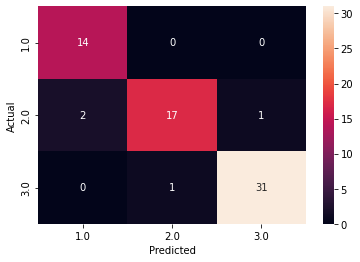

In [65]:
# Matriz de confusão do modelo
matriz_confusao = pd.crosstab(y_teste, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_confusao, annot=True)

In [66]:
print('Acurácia: ',metrics.accuracy_score(y_teste, y_pred))
plt.show()

Acurácia:  0.9393939393939394


In [67]:
# Função que verifica possível resultado em cada rodada (20 à 24) dos jogos.
def verificarResultado(rodada, rodadaAtual):
    x = 0
    for i,j in rodada.iterrows():
        # Mandante
        atualMandante = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        atualMandante = atualMandante.loc[atualMandante['time_Rodada'] == rodadaAtual]

        # # Visitante
        atualVisitante = jogo.loc[jogo['Time'].str.strip() == j['time_adversario']]
        atualVisitante = atualVisitante.loc[atualVisitante['time_Rodada'] == rodadaAtual]
        
        # Rodada Futura
        rodadaFutura = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        rodadaFutura = rodadaFutura.loc[rodadaFutura['time_rodada_anterior'] == rodadaAtual]

        teste = {
            'time_posicao': atualMandante['time_posicao'].values, 
            'time_mando_campo': atualMandante['time_mando_campo'].values, 
            'time_gols': atualMandante['time_gols'].values, 
            'time_PTS': atualMandante['time_PTS'].values, 
            'time_JG': atualMandante['time_JG'].values, 
            'time_E': atualMandante['time_E'].values, 
            'time_D': atualMandante['time_D'].values,
            'time_GP': atualMandante['time_GP'].values, 
            'time_GC': atualMandante['time_GC'].values, 
            'time_SG': atualMandante['time_SG'].values, 
            'time_adversario_Posicao': atualVisitante['time_posicao'].values, 
            'time_adversario_gols': atualVisitante['time_gols'].values, 
            'time_adversario_PTS': atualVisitante['time_PTS'].values, 
            'time_adversario_JG': atualVisitante['time_JG'].values, 
            'time_adversario_E': atualVisitante['time_E'].values, 
            'time_adversario_D': atualVisitante['time_D'].values, 
            'time_adversario_GP': atualVisitante['time_GP'].values, 
            'time_adversario_GC': atualVisitante['time_GC'].values, 
            'time_adversario_SG': atualVisitante['time_SG'].values
        }

        print("Jogo entre " + rodadaFutura['Time'].values + " e "+ rodadaFutura['time_adversario'].values)
        
        dft = pd.DataFrame(data=teste, index=[0])
        resultado = logi_reg.predict(dft)
        if resultado == 1:
            print(rodadaFutura['Time'].values + " ganha!")
        elif resultado == 2:
            print("Empate!")
        elif resultado == 3:
            print(rodadaFutura['time_adversario'].values + " ganha!")
        print()

# Filtrando a rodada para verificação dos resultados
print("Rodada 23:")
rodada = jogo.loc[jogo['time_rodada_anterior'] == 23]
rodada = rodada.loc[rodada['time_mando_campo'] == 1.0]
verificarResultado(rodada, 23)

Rodada 23:
['Jogo entre Fluminense e Coritiba']
['Fluminense ganha!']

['Jogo entre Athlético-PR e América-MG']
['América-MG ganha!']

['Jogo entre Palmeiras e Flamengo']
['Flamengo ganha!']

['Jogo entre Santos e São Paulo']
['São Paulo ganha!']

['Jogo entre Atlético-MG e Goiás']
Empate!

['Jogo entre Avaí e Internacional']
['Internacional ganha!']

['Jogo entre Bragantino e Ceará']
Empate!

['Jogo entre Juventude e Botafogo']
Empate!

['Jogo entre Fortaleza e Corinthians']
['Fortaleza ganha!']

['Jogo entre Atlético-GO e Cuiabá']
['Cuiabá ganha!']

